<a href="https://www.kaggle.com/code/ayushsaxena2211/customer-churn?scriptVersionId=162739214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
# reading the dataset
airtel = pd.read_csv("/kaggle/input/telecom-churn/telecom_churn.csv")

In [3]:
# print the dataset
airtel

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
# Get dataset information
airtel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
# finding if there are any missing values
airtel.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
# i have added 1 nan value.
airtel.iloc[2, 1] = np.nan

In [7]:
# Again check for any missing value
airtel.isna().sum()

Churn              0
AccountWeeks       1
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
# print the dataset to see the updated values
airtel

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128.0,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107.0,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,NaN,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84.0,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75.0,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192.0,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68.0,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28.0,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184.0,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [9]:
# Query to calculate mean
airtel['AccountWeeks'].mean()

101.05402160864345

In [10]:
# Query to calculate median
airtel['AccountWeeks'].median()

101.0

In [11]:
# filling the missing value with median
airtel = airtel.fillna(101.0)

In [12]:
# Again check for any missing value after filling the NAN value
airtel.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [13]:
# Iporting data visualization library 
import seaborn as sns

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

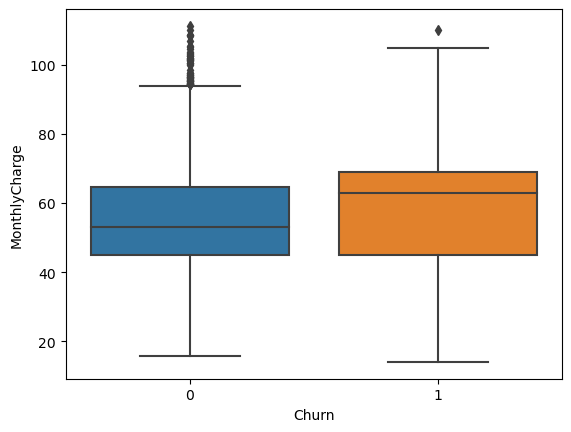

In [14]:
# Plotting a boxplot for any outlier
sns.boxplot(x='Churn', y='MonthlyCharge', data=airtel)

<AxesSubplot:xlabel='Churn', ylabel='OverageFee'>

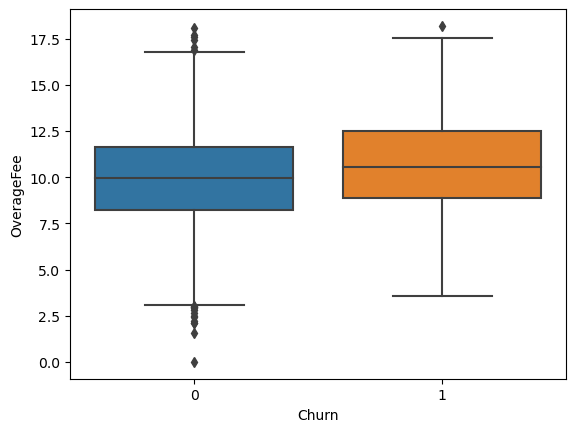

In [15]:
sns.boxplot(x='Churn', y='OverageFee', data=airtel)

<AxesSubplot:xlabel='Churn', ylabel='CustServCalls'>

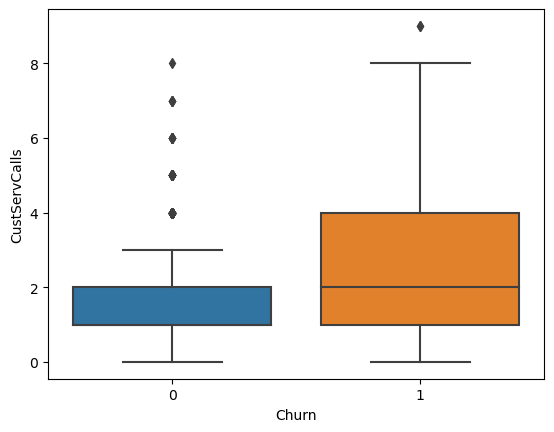

In [16]:
sns.boxplot(x='Churn', y='CustServCalls', data=airtel)

<AxesSubplot:xlabel='count', ylabel='CustServCalls'>

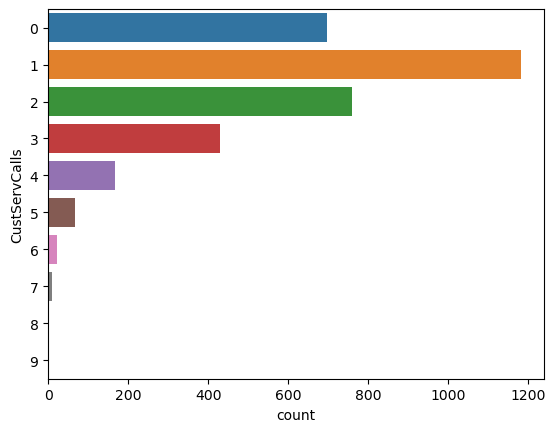

In [17]:
# Plotting a countplot
sns.countplot(y = 'CustServCalls', data = airtel)

<AxesSubplot:xlabel='MonthlyCharge', ylabel='AccountWeeks'>

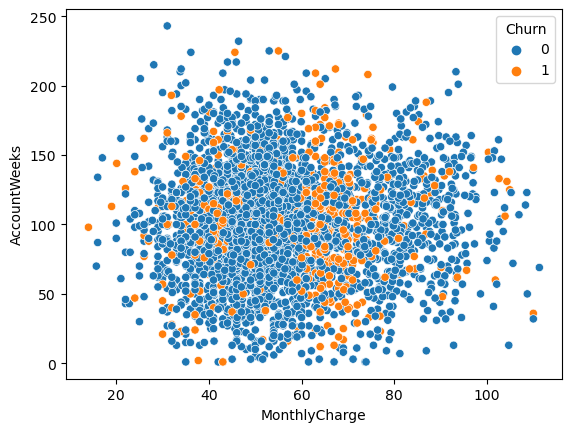

In [18]:
# Plotting a scatterplot for finding any correlation
sns.scatterplot(x='MonthlyCharge', y='AccountWeeks', data=airtel, hue = 'Churn')

In [19]:
# We can also plot piecharts, line charts using seaborn library.